In [1]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import os
import seaborn
from sklearn.linear_model import SGDClassifier
seaborn.set()

In [2]:
def printCoefs(classifier):
    # retrieve all the nonzero coefficients and zip them with their respective indices
    nonzeroes = np.nonzero(classifier.coef_[0])[0]
    coefs = zip(nonzeroes, classifier.coef_[0][nonzeroes])

    # sort the coefficients by their value, instead of index
    coefs.sort(key = lambda x: x[1], reverse=True)

    for coef in coefs[:50]:
        print coef

In [3]:
encoded = np.load("./npy_data/data_encoded_d.npy")

In [4]:
blood_types = np.load('./npy_data/blood_types.npy')

In [5]:
np.bincount(blood_types)

array([49, 30])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(encoded, blood_types, test_size=0.2)

In [7]:
X_train.shape

(63, 25019446)

In [5]:
sgd = SGDClassifier(penalty='l1', 
                    class_weight={0: .85, 1: 1.25},#'balanced', 
                    alpha=.28,
                    l1_ratio=1,
                    learning_rate='optimal', 
                    tol=1e-6,
                    max_iter=200,
                    verbose=1)

In [6]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/data-sdc/kfang/.local/lib/python2.7/site-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/usr/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7efc5fad74b0, file "/...2.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/data-sdc/kfang/.local/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/home/kfang/...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/data-sdc/kfang/.local/lib/python2.7/site-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7efc5fad74b0, file "/...2.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/data-sdc/kfang/.local/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/home/kfang/...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/data-sdc/kfang/.local/lib/python2.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 5
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 5), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 5)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=5)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'plt = plot_learning_curve(sgd, "Learning Curve: ...ncoded, blood_types, ylim=(0.05, 1000), n_jobs=4)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 24, 15, 57, 53, 57916, tzinfo=tzlocal()), 'msg_id': '0A4B34BADEE6447387D0036C27C66ED2', 'msg_type': 'execute_request', 'session': '5F990CD8D69E41689CD5096DF3F0AFE9', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0A4B34BADEE6447387D0036C27C66ED2', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['5F990CD8D69E41689CD5096DF3F0AFE9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'plt = plot_learning_curve(sgd, "Learning Curve: ...ncoded, blood_types, ylim=(0.05, 1000), n_jobs=4)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 24, 15, 57, 53, 57916, tzinfo=tzlocal()), 'msg_id': '0A4B34BADEE6447387D0036C27C66ED2', 'msg_type': 'execute_request', 'session': '5F990CD8D69E41689CD5096DF3F0AFE9', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0A4B34BADEE6447387D0036C27C66ED2', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['5F990CD8D69E41689CD5096DF3F0AFE9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'plt = plot_learning_curve(sgd, "Learning Curve: ...ncoded, blood_types, ylim=(0.05, 1000), n_jobs=4)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 24, 15, 57, 53, 57916, tzinfo=tzlocal()), 'msg_id': '0A4B34BADEE6447387D0036C27C66ED2', 'msg_type': 'execute_request', 'session': '5F990CD8D69E41689CD5096DF3F0AFE9', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0A4B34BADEE6447387D0036C27C66ED2', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'plt = plot_learning_curve(sgd, "Learning Curve...coded, blood_types, ylim=(0.05, 1000), n_jobs=4)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'plt = plot_learning_curve(sgd, "Learning Curve...coded, blood_types, ylim=(0.05, 1000), n_jobs=4)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'plt = plot_learning_curve(sgd, "Learning Curve...coded, blood_types, ylim=(0.05, 1000), n_jobs=4)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'plt = plot_learning_curve(sgd, "Learning Curve...coded, blood_types, ylim=(0.05, 1000), n_jobs=4)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'plt = plot_learning_curve(sgd, "Learning Curve...coded, blood_types, ylim=(0.05, 1000), n_jobs=4)', store_history=True, silent=False, shell_futures=True)
   2713                 self.displayhook.exec_result = result
   2714 
   2715                 # Execute the user code
   2716                 interactivity = "none" if silent else self.ast_node_interactivity
   2717                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2718                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2719                 
   2720                 self.last_execution_succeeded = not has_raised
   2721 
   2722                 # Reset this so later displayed values do not modify the

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-7-05ef39efaebe>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 7efc549cf390, executi..._before_exec=None error_in_exec=None result=None>)
   2817 
   2818         try:
   2819             for i, node in enumerate(to_run_exec):
   2820                 mod = ast.Module([node])
   2821                 code = compiler(mod, cell_name, "exec")
-> 2822                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7efc58bf6c30, file "<ipython-input-7-05ef39efaebe>", line 1>
        result = <ExecutionResult object at 7efc549cf390, executi..._before_exec=None error_in_exec=None result=None>
   2823                     return True
   2824 
   2825             for i, node in enumerate(to_run_interactive):
   2826                 mod = ast.Interactive([node])

...........................................................................
/home/kfang/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7efc58bf6c30, file "<ipython-input-7-05ef39efaebe>", line 1>, result=<ExecutionResult object at 7efc549cf390, executi..._before_exec=None error_in_exec=None result=None>)
   2877         outflag = 1  # happens in more places, so it's easier as default
   2878         try:
   2879             try:
   2880                 self.hooks.pre_run_code_hook()
   2881                 #rprint('Running code', repr(code_obj)) # dbg
-> 2882                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7efc58bf6c30, file "<ipython-input-7-05ef39efaebe>", line 1>
        self.user_global_ns = {'In': ['', u"from sklearn.svm import LinearSVC\nfrom sklear...linear_model import SGDClassifier\nseaborn.set()", u'def printCoefs(classifier):\n    # retrieve al...n    for coef in coefs[:50]:\n        print coef', u'encoded = np.load("./npy_data/data_encoded_d.npy")', u"blood_types = np.load('./npy_data/blood_types.npy')", u"sgd = SGDClassifier(penalty='l1', \n          ...   max_iter=200,\n                    verbose=1)", u'from sklearn.model_selection import learning_c...")\n\n    plt.legend(loc="best")\n    return plt', u'plt = plot_learning_curve(sgd, "Learning Curve...coded, blood_types, ylim=(0.05, 1000), n_jobs=4)'], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {}, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, '_': '', '__': '', '___': '', '__builtin__': <module '__builtin__' (built-in)>, '__builtins__': <module '__builtin__' (built-in)>, ...}
        self.user_ns = {'In': ['', u"from sklearn.svm import LinearSVC\nfrom sklear...linear_model import SGDClassifier\nseaborn.set()", u'def printCoefs(classifier):\n    # retrieve al...n    for coef in coefs[:50]:\n        print coef', u'encoded = np.load("./npy_data/data_encoded_d.npy")', u"blood_types = np.load('./npy_data/blood_types.npy')", u"sgd = SGDClassifier(penalty='l1', \n          ...   max_iter=200,\n                    verbose=1)", u'from sklearn.model_selection import learning_c...")\n\n    plt.legend(loc="best")\n    return plt', u'plt = plot_learning_curve(sgd, "Learning Curve...coded, blood_types, ylim=(0.05, 1000), n_jobs=4)'], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {}, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, '_': '', '__': '', '___': '', '__builtin__': <module '__builtin__' (built-in)>, '__builtins__': <module '__builtin__' (built-in)>, ...}
   2883             finally:
   2884                 # Reset our crash handler in place
   2885                 sys.excepthook = old_excepthook
   2886         except SystemExit as e:

...........................................................................
/data-sdc/kfang/one_hot_blood_type/<ipython-input-7-05ef39efaebe> in <module>()
----> 1 plt = plot_learning_curve(sgd, "Learning Curve: SGDClassifier", encoded, blood_types, ylim=(0.05, 1000), n_jobs=4)

...........................................................................
/data-sdc/kfang/one_hot_blood_type/<ipython-input-6-2950dde06f95> in plot_learning_curve(estimator=SGDClassifier(alpha=0.28, average=False, class_w...fle=True, tol=1e-06, verbose=1, warm_start=False), title='Learning Curve: SGDClassifier', X=array([[0., 1., 1., ..., 0., 1., 0.],
       [0...., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.]]), y=array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]), ylim=(0.05, 1000), cv=None, n_jobs=4, train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))
     46     if ylim is not None:
     47         plt.ylim(*ylim)
     48     plt.xlabel("Training examples")
     49     plt.ylabel("Score")
     50     train_sizes, train_scores, test_scores = learning_curve(
---> 51         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
     52     train_scores_mean = np.mean(train_scores, axis=1)
     53     train_scores_std = np.std(train_scores, axis=1)
     54     test_scores_mean = np.mean(test_scores, axis=1)
     55     test_scores_std = np.std(test_scores, axis=1)

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py in learning_curve(estimator=SGDClassifier(alpha=0.28, average=False, class_w...fle=True, tol=1e-06, verbose=1, warm_start=False), X=array([[0., 1., 1., ..., 0., 1., 0.],
       [0...., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.]]), y=array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]), groups=None, train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False), scoring=None, exploit_incremental_learning=False, n_jobs=4, pre_dispatch='all', verbose=0, shuffle=False, random_state=None)
   1123                 train_test_proportions.append((train[:n_train_samples], test))
   1124 
   1125         out = parallel(delayed(_fit_and_score)(
   1126             clone(estimator), X, y, scorer, train, test,
   1127             verbose, parameters=None, fit_params=None, return_train_score=True)
-> 1128             for train, test in train_test_proportions)
        train = array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 43, 44, 45, 46, 47, 48, 50, 54,
       57, 59])
        test = array([49, 51, 52, 53, 55, 56, 58, 60, 61, 62, 6..., 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78])
        train_test_proportions = [(array([24, 25, 29, 30, 31]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28])), (array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28])), (array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3...     44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28])), (array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3..., 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28])), (array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3..., 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28])), (array([0, 1, 2, 3, 4]), array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3..., 43,
       44, 45, 46, 47, 48, 50, 54, 57, 59])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3..., 43,
       44, 45, 46, 47, 48, 50, 54, 57, 59])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 49]), array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3..., 43,
       44, 45, 46, 47, 48, 50, 54, 57, 59])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 53, 55, 56, 58,
       60, 61, 62, 63, 64, 65]), array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3..., 43,
       44, 45, 46, 47, 48, 50, 54, 57, 59])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77]), array([24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 3..., 43,
       44, 45, 46, 47, 48, 50, 54, 57, 59])), (array([0, 1, 2, 3, 4]), array([49, 51, 52, 53, 55, 56, 58, 60, 61, 62, 6..., 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([49, 51, 52, 53, 55, 56, 58, 60, 61, 62, 6..., 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([49, 51, 52, 53, 55, 56, 58, 60, 61, 62, 6..., 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([49, 51, 52, 53, 55, 56, 58, 60, 61, 62, 6..., 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 42, 43, 44, 45, 46, 47, 48, 50, 54,
       57]), array([49, 51, 52, 53, 55, 56, 58, 60, 61, 62, 6..., 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78]))]
   1129         out = np.array(out)
   1130         n_cv_folds = out.shape[0] // n_unique_ticks
   1131         out = out.reshape(n_cv_folds, n_unique_ticks, 2)
   1132 

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Fri Aug 24 15:58:56 2018
PID: 76021                                   Python 2.7.12: /usr/bin/python
...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (SGDClassifier(alpha=0.28, average=False, class_w...fle=True, tol=1e-06, verbose=1, warm_start=False), memmap([[0., 1., 1., ..., 0., 1., 0.],
        [... 1., 0.],
        [0., 1., 1., ..., 1., 0., 1.]]), array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]), <function _passthrough_scorer>, array([24, 25, 29, 30, 31]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28]), 0)
        kwargs = {'fit_params': None, 'parameters': None, 'return_train_score': True}
        self.items = [(<function _fit_and_score>, (SGDClassifier(alpha=0.28, average=False, class_w...fle=True, tol=1e-06, verbose=1, warm_start=False), memmap([[0., 1., 1., ..., 0., 1., 0.],
        [... 1., 0.],
        [0., 1., 1., ..., 1., 0., 1.]]), array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]), <function _passthrough_scorer>, array([24, 25, 29, 30, 31]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28]), 0), {'fit_params': None, 'parameters': None, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=SGDClassifier(alpha=0.28, average=False, class_w...fle=True, tol=1e-06, verbose=1, warm_start=False), X=memmap([[0., 1., 1., ..., 0., 1., 0.],
        [... 1., 0.],
        [0., 1., 1., ..., 1., 0., 1.]]), y=array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]), scorer=<function _passthrough_scorer>, train=array([24, 25, 29, 30, 31]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       17, 18, 19, 20, 21, 22, 23, 26, 27, 28]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    443     if parameters is not None:
    444         estimator.set_params(**parameters)
    445 
    446     start_time = time.time()
    447 
--> 448     X_train, y_train = _safe_split(estimator, X, y, train)
        X_train = undefined
        y_train = undefined
        estimator = SGDClassifier(alpha=0.28, average=False, class_w...fle=True, tol=1e-06, verbose=1, warm_start=False)
        X = memmap([[0., 1., 1., ..., 0., 1., 0.],
        [... 1., 0.],
        [0., 1., 1., ..., 1., 0., 1.]])
        y = array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])
        train = array([24, 25, 29, 30, 31])
    449     X_test, y_test = _safe_split(estimator, X, y, test, train)
    450 
    451     is_multimetric = not callable(scorer)
    452     n_scorers = len(scorer.keys()) if is_multimetric else 1

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/utils/metaestimators.py in _safe_split(estimator=SGDClassifier(alpha=0.28, average=False, class_w...fle=True, tol=1e-06, verbose=1, warm_start=False), X=memmap([[0., 1., 1., ..., 0., 1., 0.],
        [... 1., 0.],
        [0., 1., 1., ..., 1., 0., 1.]]), y=array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]), indices=array([24, 25, 29, 30, 31]), train_indices=None)
    195         if train_indices is None:
    196             X_subset = X[np.ix_(indices, indices)]
    197         else:
    198             X_subset = X[np.ix_(indices, train_indices)]
    199     else:
--> 200         X_subset = safe_indexing(X, indices)
        X_subset = undefined
        X = memmap([[0., 1., 1., ..., 0., 1., 0.],
        [... 1., 0.],
        [0., 1., 1., ..., 1., 0., 1.]])
        indices = array([24, 25, 29, 30, 31])
    201 
    202     if y is not None:
    203         y_subset = safe_indexing(y, indices)
    204     else:

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py in safe_indexing(X=memmap([[0., 1., 1., ..., 0., 1., 0.],
        [... 1., 0.],
        [0., 1., 1., ..., 1., 0., 1.]]), indices=array([24, 25, 29, 30, 31]))
    155             return X.copy().iloc[indices]
    156     elif hasattr(X, "shape"):
    157         if hasattr(X, 'take') and (hasattr(indices, 'dtype') and
    158                                    indices.dtype.kind == 'i'):
    159             # This is often substantially faster than X[indices]
--> 160             return X.take(indices, axis=0)
        X.take = <built-in method take of memmap object>
        indices = array([24, 25, 29, 30, 31])
    161         else:
    162             return X[indices]
    163     else:
    164         return [X[idx] for idx in indices]

MemoryError: 
___________________________________________________________________________

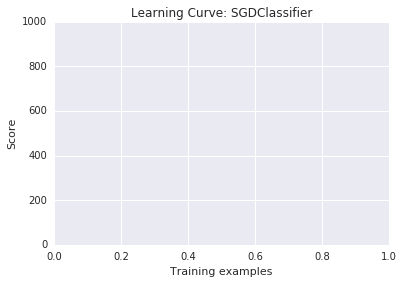

In [7]:
plt = plot_learning_curve(sgd, "Learning Curve: SGDClassifier", encoded, blood_types, ylim=(0.05, 1000), n_jobs=4)

In [ ]:
plt.show()

In [ ]:
sgd.fit(X_train, y_train)

In [ ]:
y_pred = sgd.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [9]:
sgd_el = SGDClassifier(penalty='elasticnet', 
                    class_weight='balanced', 
                    alpha=.28,
                    l1_ratio=0.6,
                    learning_rate='optimal', 
                    tol=1e-6,
                    max_iter=200,
                    verbose=1)

In [10]:
sgd_el.fit(X_train, y_train)

-- Epoch 1
Norm: 2475.62, NNZs: 6928, Bias: 0.046718, T: 63, Avg. loss: 120455.441206
Total training time: 16.84 seconds.
-- Epoch 2
Norm: 1986.01, NNZs: 24, Bias: 0.067845, T: 126, Avg. loss: 2.091317
Total training time: 32.88 seconds.
-- Epoch 3
Norm: 1762.84, NNZs: 28, Bias: -0.051755, T: 189, Avg. loss: 0.267506
Total training time: 55.76 seconds.
-- Epoch 4
Norm: 1613.85, NNZs: 20, Bias: -0.054179, T: 252, Avg. loss: 0.205908
Total training time: 75.62 seconds.
-- Epoch 5
Norm: 1502.78, NNZs: 22, Bias: -0.085741, T: 315, Avg. loss: 0.178381
Total training time: 95.46 seconds.
-- Epoch 6
Norm: 1415.12, NNZs: 20, Bias: -0.126840, T: 378, Avg. loss: 0.153987
Total training time: 113.69 seconds.
-- Epoch 7
Norm: 1346.61, NNZs: 19, Bias: -0.111868, T: 441, Avg. loss: 0.157388
Total training time: 132.90 seconds.
Convergence after 7 epochs took 132.98 seconds


SGDClassifier(alpha=0.28, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.6, learning_rate='optimal',
       loss='hinge', max_iter=200, n_iter=None, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       tol=1e-06, verbose=1, warm_start=False)

In [25]:
cv_score = cross_val_score(sgd_el, encoded, blood_types, cv=10, scoring='accuracy')
print(cv_score.mean(), cv_score.std())

-- Epoch 1
Norm: 2091.97, NNZs: 117, Bias: -0.106338, T: 71, Avg. loss: 68822.464262
Total training time: 17.72 seconds.
-- Epoch 2
Norm: 1769.09, NNZs: 16, Bias: -0.227014, T: 142, Avg. loss: 0.381036
Total training time: 40.39 seconds.
-- Epoch 3
Norm: 1563.36, NNZs: 10, Bias: -0.312362, T: 213, Avg. loss: 0.156752
Total training time: 59.45 seconds.
-- Epoch 4
Norm: 1429.18, NNZs: 8, Bias: -0.326453, T: 284, Avg. loss: 0.133793
Total training time: 81.06 seconds.
-- Epoch 5
Norm: 1329.87, NNZs: 8, Bias: -0.350923, T: 355, Avg. loss: 0.122433
Total training time: 102.25 seconds.
-- Epoch 6
Norm: 1252.33, NNZs: 5, Bias: -0.356404, T: 426, Avg. loss: 0.121088
Total training time: 123.13 seconds.
-- Epoch 7
Norm: 1190.05, NNZs: 6, Bias: -0.372749, T: 497, Avg. loss: 0.116961
Total training time: 143.80 seconds.
-- Epoch 8
Norm: 1137.86, NNZs: 6, Bias: -0.381005, T: 568, Avg. loss: 0.114178
Total training time: 165.17 seconds.
-- Epoch 9
Norm: 1093.80, NNZs: 6, Bias: -0.385317, T: 639, A

Norm: 1801.05, NNZs: 20, Bias: -0.211226, T: 142, Avg. loss: 0.903626
Total training time: 34.98 seconds.
-- Epoch 3
Norm: 1595.56, NNZs: 10, Bias: -0.263422, T: 213, Avg. loss: 0.176330
Total training time: 55.45 seconds.
-- Epoch 4
Norm: 1455.87, NNZs: 11, Bias: -0.334239, T: 284, Avg. loss: 0.148983
Total training time: 76.72 seconds.
-- Epoch 5
Norm: 1354.53, NNZs: 10, Bias: -0.332585, T: 355, Avg. loss: 0.132159
Total training time: 96.47 seconds.
-- Epoch 6
Norm: 1274.55, NNZs: 8, Bias: -0.354518, T: 426, Avg. loss: 0.124778
Total training time: 117.48 seconds.
-- Epoch 7
Norm: 1210.46, NNZs: 8, Bias: -0.341302, T: 497, Avg. loss: 0.123459
Total training time: 137.32 seconds.
-- Epoch 8
Norm: 1157.28, NNZs: 8, Bias: -0.361275, T: 568, Avg. loss: 0.121967
Total training time: 158.85 seconds.
-- Epoch 9
Norm: 1111.63, NNZs: 8, Bias: -0.364297, T: 639, Avg. loss: 0.117692
Total training time: 178.54 seconds.
-- Epoch 10
Norm: 1072.27, NNZs: 8, Bias: -0.375503, T: 710, Avg. loss: 0.1

In [11]:
y_pred = sgd_el.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [12]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [13]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [14]:
printCoefs(sgd_el)

(14151619, 0.4738850908986042)
(14151629, 0.29839267233162114)
(14151706, 0.28546882998985745)
(14151717, 0.07628014300941253)
(14151726, 0.07628014300941253)
(14151790, 0.00942448229535414)
(23428091, -0.0033133924618367313)
(2172641, -0.004068812548888826)
(672210, -0.0057361629238993316)
(2951602, -0.008790558259495066)
(5815439, -0.012866311473481749)
(21481203, -0.023351146546680364)
(39427, -0.02421235748011162)
(39479, -0.02421235748011162)
(14151770, -0.04452715897346624)
(14151760, -0.04854806249924858)
(5815273, -0.1207113767067516)
(14151725, -0.15455996851896595)
(14151618, -0.47010591181939665)


In [22]:
from sklearn.externals import joblib
joblib.dump(sgd_el, "npy_data/sgd_el.pkl")

['npy_data/sgd_el.pkl']

In [ ]:
linear = LinearSVC(penalty='l1', class_weight='balanced', C=.06, dual=False, verbose=1, max_iter=2500)
linear.fit(X_train, y_train)
print(accuracy_score(y_test, linear.predict(X_test)))

In [ ]:
print(linear.predict(X_test))

In [ ]:
sgd_cv = SGDClassifier(penalty='l1', 
                    class_weight='balanced', 
                    warm_start=False,
                    alpha=3,
                    l1_ratio=1,
                    learning_rate='optimal', 
                    max_iter=5,
                    verbose=1)

In [ ]:
cv_score = cross_val_score(sgd_cv, encoded, blood_types, cv=10, scoring='accuracy')

In [ ]:
print(cv_score.mean(), cv_score.std())

In [ ]:
clf = LogisticRegression(penalty='l1', dual=False, C=.5, verbose=1, class_weight='balanced')

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
np.argmax(np.abs(clf.coef_))

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# time for classifier takes approximately 7 minutes * n_estimators
bag = BaggingClassifier(base_estimator=clf, n_estimators=3)

In [ ]:
bag.fit(X_train, y_train)

In [ ]:
y_pred = bag.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
y_train_pred = clf.predict(X_train)

In [ ]:
for i in (classifier.coef_[0] > 1e-04):
    if not i == False:
        print("True")

In [ ]:
ones = np.nonzero(blood_types)[0]
np.random.shuffle(ones)
zeros = np.where(blood_types == 0)[0]
keep_idx = np.concatenate((zeros, ones[0:15]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded[keep_idx], blood_types[keep_idx], test_size=0.2)

In [ ]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
# retrieve all the nonzero coefficients and zip them with their respective indices
nonzeroes = np.nonzero(svc.coef_[0])[0]
coefs = zip(nonzeroes, svc.coef_[0][nonzeroes])

# sort the coefficients by their value, instead of index
coefs.sort(key = lambda x: x[1], reverse=True)

for coef in coefs:
    print coef